# Principal Component Analysis with Cancer Data

In [201]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [202]:
dfcancer = pd.read_csv("Cancer.csv")
dfcancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [203]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [204]:
dfcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


<b>Observation:</b>
- There is no missing value
- Datatype of Bare Nuclei is Object and datatypes for rest are numeric.

In [205]:
dfcancer.shape

(699, 11)

<b>Observation:</b>
- There are 699 rows and 11 attributes in dataset. 

In [206]:
dfcancer.nunique()

ID                             645
ClumpThickness                  10
Cell Size                       10
Cell Shape                      10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     11
Normal Nucleoli                 10
Bland Chromatin                 10
Mitoses                          9
Class                            2
dtype: int64

In [207]:
dfcancer["Class"].unique()

array([2, 4], dtype=int64)

<b>Observation:</b>
- Class is categorical varialble

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [136]:
# Datatype of Bare Nuclei is Object. Hence, verify the non-numeric values in Bare Nuclei column. 
dfcancer["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [212]:
402/699

0.575107296137339

<b>Observation:</b>
- 57% (402)of records distributed with 1. Hence, we can replace "?" with mode of Bare Nuclei (i.e) 1.

In [214]:
# Replace "?" with 1
dfcancer['Bare Nuclei'] = np.where(dfcancer['Bare Nuclei']=='?','1',dfcancer['Bare Nuclei'])

In [215]:
# Convert the datatype from Object to Int64
dfcancer['Bare Nuclei'] = dfcancer['Bare Nuclei'].astype('int64')

In [217]:
# To verify the datatype for Bare Nuclei 
dfcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           699 non-null    int64
 1   ClumpThickness               699 non-null    int64
 2   Cell Size                    699 non-null    int64
 3   Cell Shape                   699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Bland Chromatin              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [218]:
# Check for missing value in any other column
dfcancer.isnull().sum() 


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

<b>Observation:</b>
- No missing value found in dataset.

In [141]:
# Checking the duplicate records
dfcancer.duplicated().value_counts()


False    690
True       9
dtype: int64

In [142]:
dfcancer[dfcancer.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


<b>Observation:</b>
- There are 9 records duplicated.

In [219]:
dfcancer.shape

(699, 11)

In [220]:
# Deleting the duplicated records
dfcancer.drop_duplicates(keep="first", inplace=True)

In [221]:
# To confirm that duplicated are deleted. 
dfcancer.shape

(690, 11)

In [222]:
# ID column is having unique values. We can remove this attribute as it is not required for analysis. 
dfcancer.drop("ID", axis=1, inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


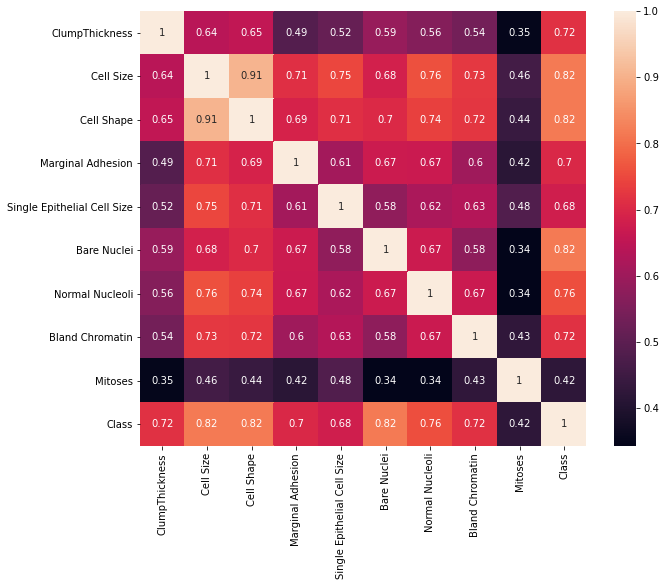

In [225]:
# Check for correlation of variables
plt.figure(figsize=(10,8))
sns.heatmap(dfcancer.corr(), annot=True)

<b>Observation:</b>
- Many attributes are having multico-linearity. there is co-related with each other
- Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
  and bland chromatin
- Target variable shows high correlation with most of these variables
- Miltoses shows lower significance with other attributes 

C:\Users\syed.mohammed.yusuf\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


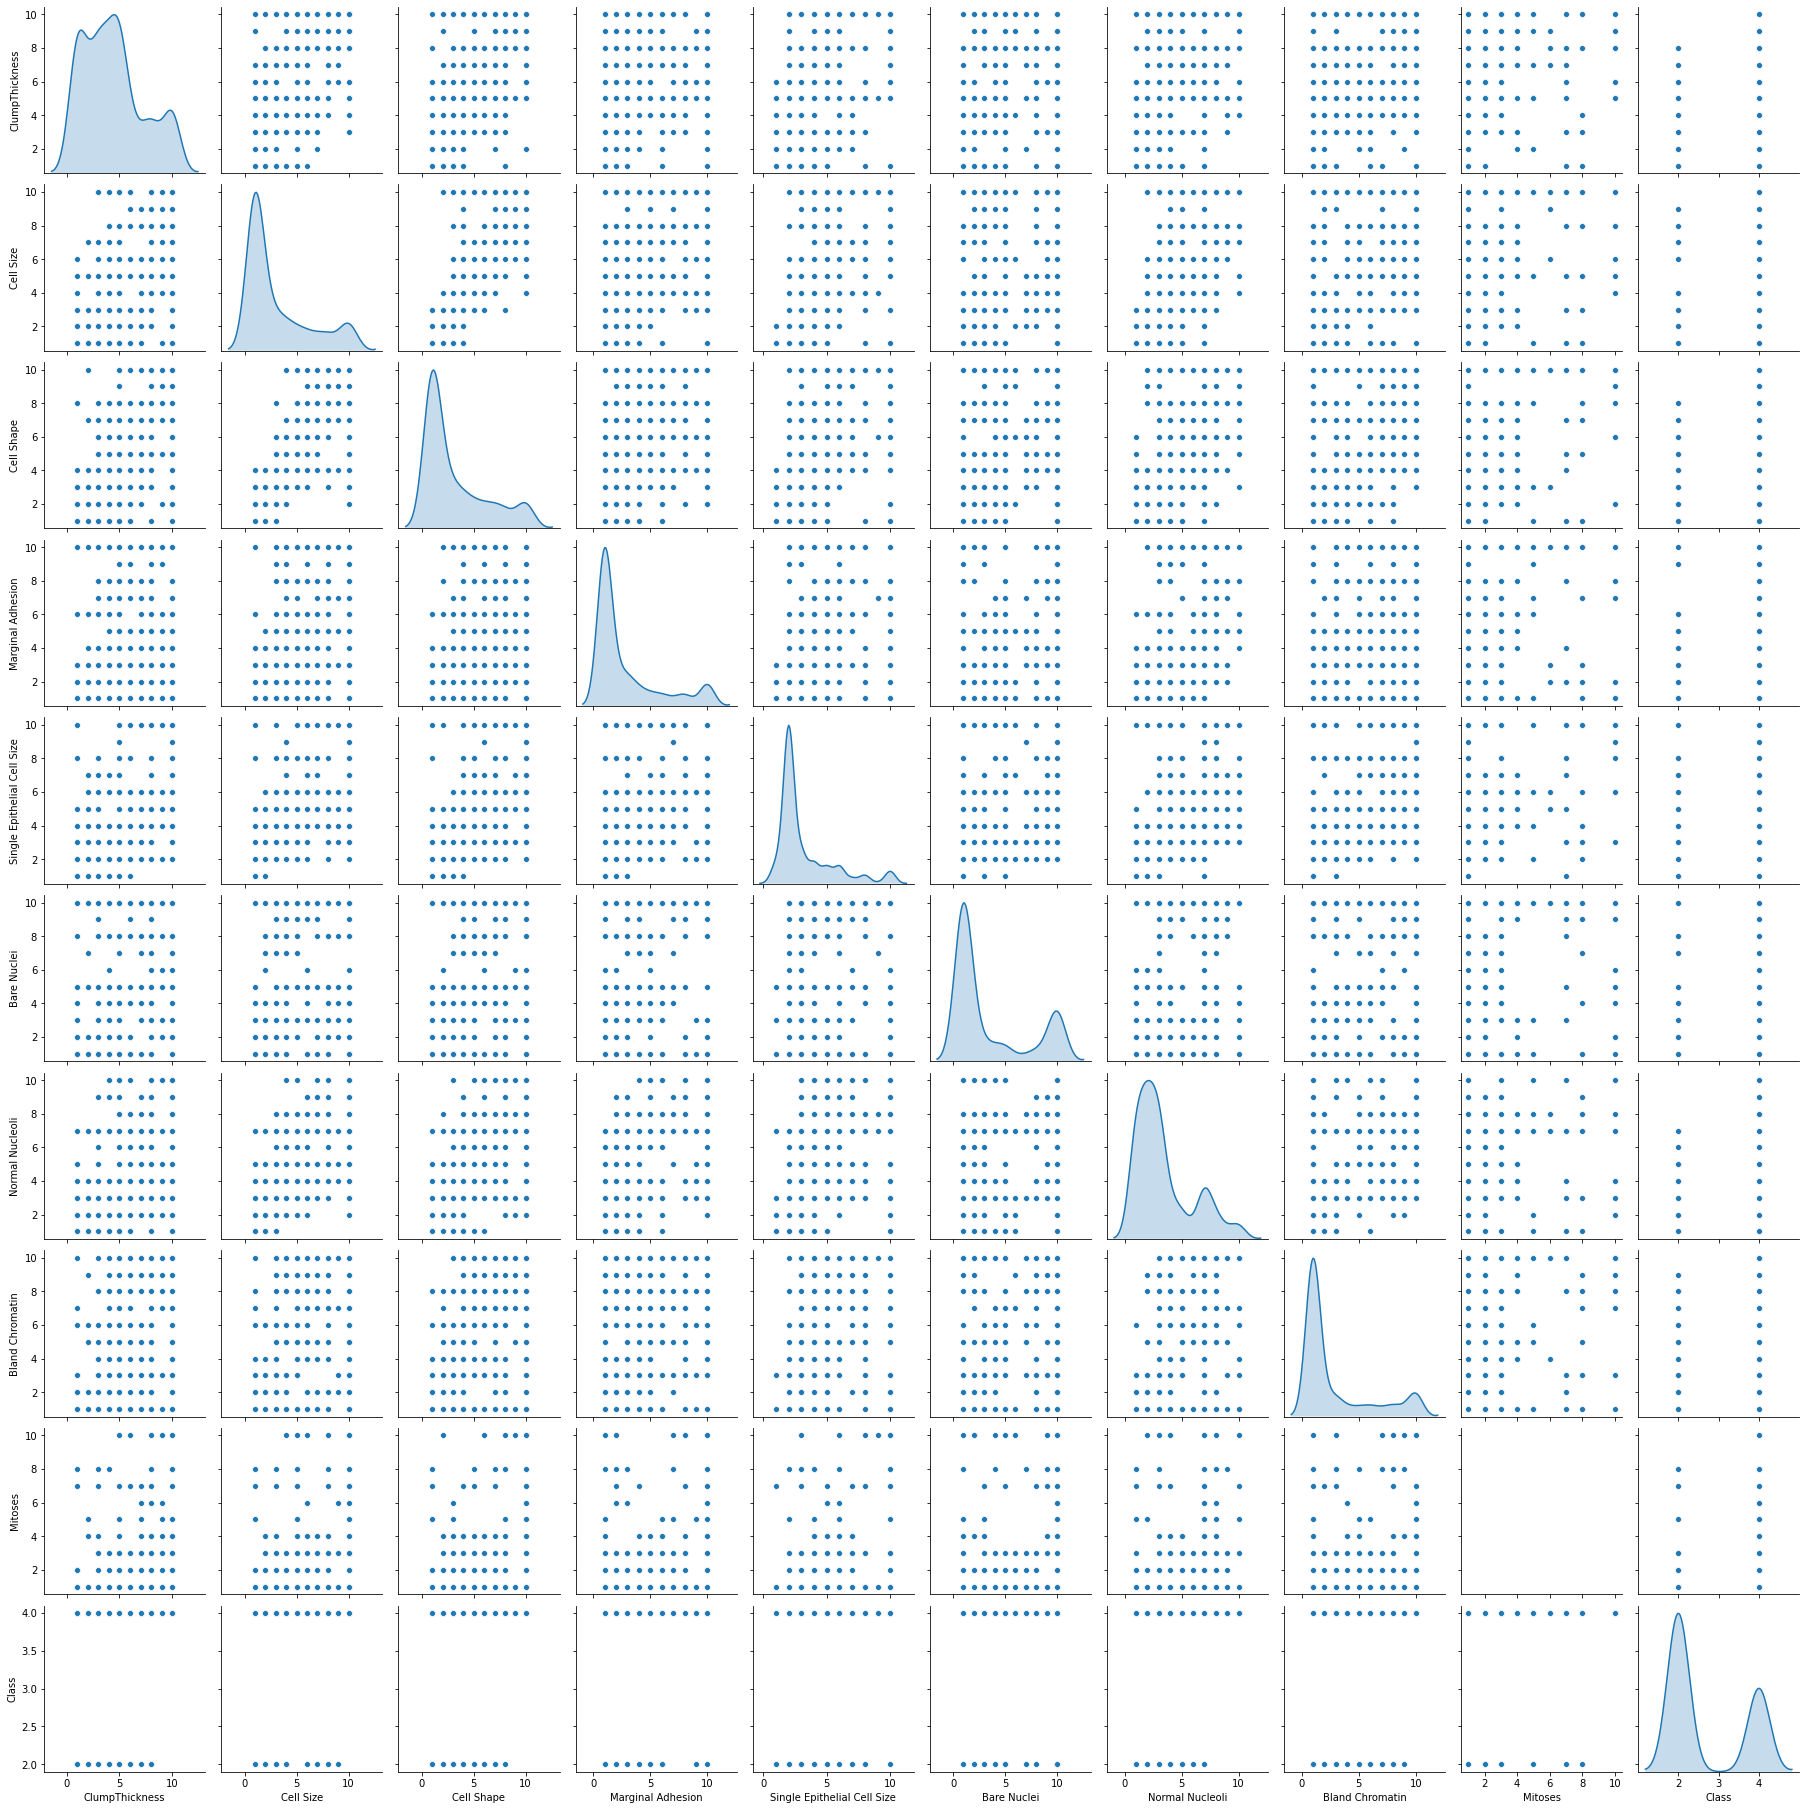

In [112]:
#Let us check the pair plot
sns.pairplot(dfcancer, diag_kind='kde')


<b>Observation:</b>
- There is no linear relationship between the variables. 


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

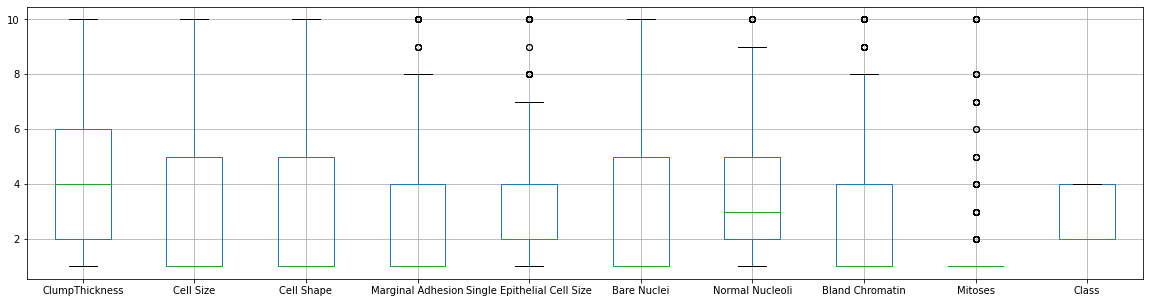

In [227]:
# Since the all the attributes are same scale, we can skip apply the scaling but we need to handle scaling in real time if data is not scaled properly.
# Verify the outliers using Boxplot
dfcancer.boxplot(figsize=(20,5))


<b>Observation:</b>
- There are outliers in Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoli, Bland Chromatin and Miltoses.

In [228]:
# Handling the outlier by updating upperwhisker values 
dfcancer.loc[dfcancer['Marginal Adhesion'] > 8, 'Marginal Adhesion'] = 8
dfcancer.loc[dfcancer['Single Epithelial Cell Size'] > 7, 'Single Epithelial Cell Size'] = 7
dfcancer.loc[dfcancer['Normal Nucleoli'] > 9, 'Normal Nucleoli'] = 9
dfcancer.loc[dfcancer['Bland Chromatin'] > 8, 'Bland Chromatin'] = 8

In [151]:
# To find the outlier distribution in Miltoses
dfcancer['Mitoses'].value_counts()

1     571
2      35
3      32
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [152]:
571/699

0.8168812589413448

<b>Observation:</b>
- There are above 17% of records having outlier in Mitoses. Hence we can remove this attribute for analysis. 

In [229]:
dfcancer.drop('Mitoses', inplace=True, axis=1)

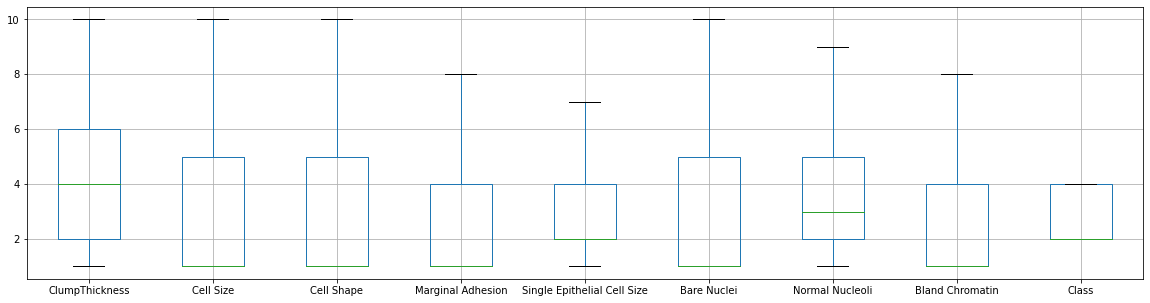

In [231]:
# To confirm whether outlier present in dataset
dfcancer.boxplot(figsize=(20,5))

# Q6 Create a covariance matrix for identifying Principal components

In [232]:
# To remove the target variable Class
dfcancer.drop('Class', inplace=True, axis=1)

In [233]:
# Step 1 - Create covariance matrix
cov_matrix = np.cov(dfcancer.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 7.93762016  5.51311079  5.45212343  3.52595444  2.7211081   6.01908248
   3.78585642  4.0697966 ]
 [ 5.51311079  9.25650701  8.15558781  5.51117562  4.20261248  7.53352685
   5.4782777   5.86202225]
 [ 5.45212343  8.15558781  8.76659936  5.17825456  3.93215751  7.54129488
   5.18516438  5.66958415]
 [ 3.52595444  5.51117562  5.17825456  6.14316905  2.92480596  6.16971036
   4.04251909  4.13121727]
 [ 2.7211081   4.20261248  3.93215751  2.92480596  3.1312362   4.00301003
   2.76714205  3.21245031]
 [ 6.01908248  7.53352685  7.54129488  6.16971036  4.00301003 13.08315139
   5.83655581  5.72093772]
 [ 3.78585642  5.4782777   5.18516438  4.04251909  2.76714205  5.83655581
   5.62055699  4.24437223]
 [ 4.0697966   5.86202225  5.66958415  4.13121727  3.21245031  5.72093772
   4.24437223  6.94449212]]


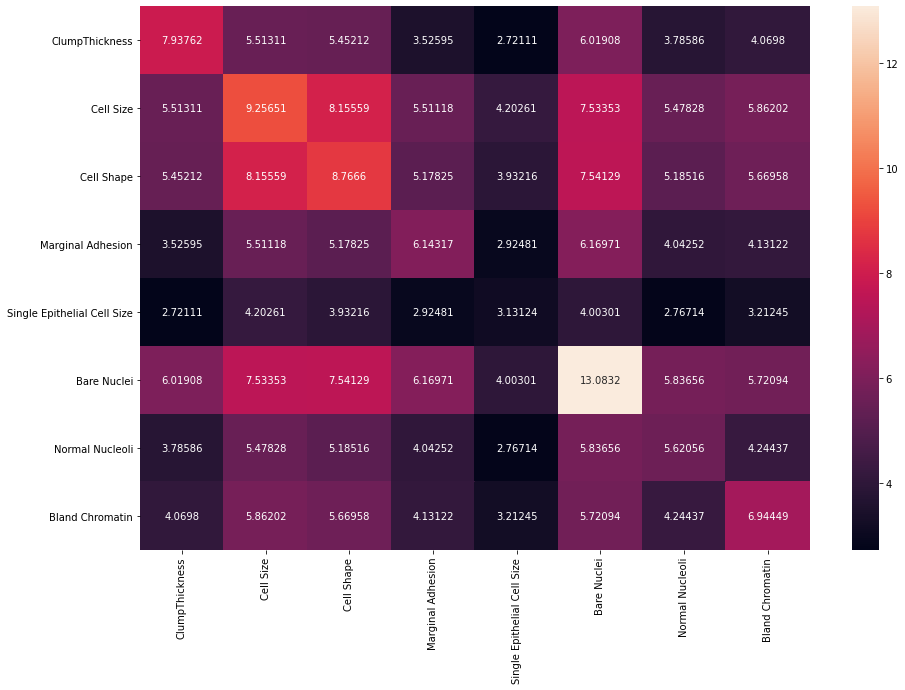

In [234]:
covMatrix = pd.DataFrame.cov(dfcancer)
plt.figure(figsize=(15,10))
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()


# Q7 Identify eigen values and eigen vector

In [235]:
# Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.31719888 -0.07528555 -0.91251977  0.0742995   0.23200557  0.03684812
   0.01778929 -0.00183623]
 [-0.42228661 -0.33046648  0.09973766 -0.37376694 -0.19109509  0.02593742
   0.11353091 -0.71605673]
 [-0.41005114 -0.26653421  0.04188218 -0.35034225 -0.34752929  0.08367114
  -0.40847046  0.58454955]
 [-0.30586475  0.06148296  0.30615497 -0.13306547  0.80477873  0.34771851
  -0.14539946  0.03887612]
 [-0.21642998 -0.12790096  0.09983145 -0.01063544 -0.02731131  0.1327316
   0.88318487  0.35824696]
 [-0.46746514  0.83840221  0.03439723  0.05878517 -0.25966924  0.04695762
   0.01449035 -0.06384442]
 [-0.30018638 -0.04763207  0.1387124   0.07603304  0.2386383  -0.90461819
   0.01387514  0.084394  ]
 [-0.32231389 -0.29792218  0.17743861  0.83963201 -0.12684012  0.17861602
  -0.13559925 -0.0671603 ]]

 Eigen Values 
%s [44.17066897  4.65306935  4.01038881  2.41892562  2.07250831  1.72878008
  1.04208273  0.78690841]


# Q8 Find variance and cumulative variance by each eigen vector

In [236]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort(reverse = True)

train_eig_pairs

[(44.17066896809031,
  array([-0.31719888, -0.07528555, -0.91251977,  0.0742995 ,  0.23200557,
          0.03684812,  0.01778929, -0.00183623])),
 (4.653069352475787,
  array([-0.42228661, -0.33046648,  0.09973766, -0.37376694, -0.19109509,
          0.02593742,  0.11353091, -0.71605673])),
 (4.0103888128581335,
  array([-0.41005114, -0.26653421,  0.04188218, -0.35034225, -0.34752929,
          0.08367114, -0.40847046,  0.58454955])),
 (2.4189256152128213,
  array([-0.30586475,  0.06148296,  0.30615497, -0.13306547,  0.80477873,
          0.34771851, -0.14539946,  0.03887612])),
 (2.072508312860621,
  array([-0.21642998, -0.12790096,  0.09983145, -0.01063544, -0.02731131,
          0.1327316 ,  0.88318487,  0.35824696])),
 (1.728780080195776,
  array([-0.46746514,  0.83840221,  0.03439723,  0.05878517, -0.25966924,
          0.04695762,  0.01449035, -0.06384442])),
 (1.0420827329674978,
  array([-0.30018638, -0.04763207,  0.1387124 ,  0.07603304,  0.2386383 ,
         -0.90461819,  0.0

In [247]:
#Separate the sorted Eigen values and Eigen vectors for subsequent use.
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)
print('Eigenvectors in descending order: \n%s' %train_eigvectors_sorted)

Eigenvalues in descending order: 
[44.17066896809031, 4.653069352475787, 4.0103888128581335, 2.4189256152128213, 2.072508312860621, 1.728780080195776, 1.0420827329674978, 0.7869084069485672]
Eigenvectors in descending order: 
[array([-0.31719888, -0.07528555, -0.91251977,  0.0742995 ,  0.23200557,
        0.03684812,  0.01778929, -0.00183623]), array([-0.42228661, -0.33046648,  0.09973766, -0.37376694, -0.19109509,
        0.02593742,  0.11353091, -0.71605673]), array([-0.41005114, -0.26653421,  0.04188218, -0.35034225, -0.34752929,
        0.08367114, -0.40847046,  0.58454955]), array([-0.30586475,  0.06148296,  0.30615497, -0.13306547,  0.80477873,
        0.34771851, -0.14539946,  0.03887612]), array([-0.21642998, -0.12790096,  0.09983145, -0.01063544, -0.02731131,
        0.1327316 ,  0.88318487,  0.35824696]), array([-0.46746514,  0.83840221,  0.03439723,  0.05878517, -0.25966924,
        0.04695762,  0.01449035, -0.06384442]), array([-0.30018638, -0.04763207,  0.1387124 ,  0.0760

In [248]:
# Sum up all the Eigen values to reflect the total covariance captured from original feature space
tot = sum(eigenvalues)

# Array of variance explained by each Eigen vector will be generated
var_explained = [(i / tot) for i in train_eigvalues_sorted] 

# An array of cumulative covariance captured by the Eigen vectors together
cum_var_exp = np.cumsum(var_explained) 

In [249]:
print("Variance:", var_explained)

Variance: [0.7254969022356312, 0.07642599670716935, 0.06587006102603743, 0.03973050627426785, 0.03404065177107011, 0.028394964851783795, 0.01711605941914369, 0.012924857714896489]


In [250]:
print("Cumulative Variance:", cum_var_exp*100)

Cumulative Variance: [ 72.54969022  80.19228989  86.779296    90.75234662  94.1564118
  96.99590829  98.70751423 100.        ]


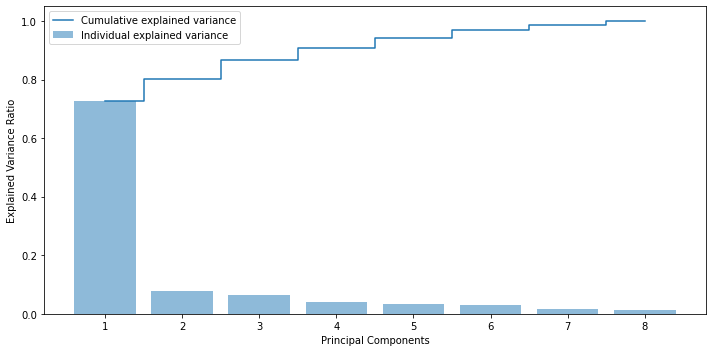

In [251]:
# Plot the graph for Cumulative vs Individual explained variance
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


<b>Observation:</b>
- There is 90% of Explained Variance from PCA1 to PCA4.
- There is a variance reduction from PCA5 to PCA8. 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [252]:
# Consider Principle components is 4 and apply the PCA
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(dfcancer)
X_reduced.T

array([[-4.18447597,  5.14764637, -4.35140859, ...,  9.69250262,
         6.45369452,  7.6189289 ],
       [ 0.27843372, -4.78468894, -0.71053959, ...,  6.81479   ,
         3.05273338,  2.21797324],
       [-1.8802071 ,  0.75544324, -0.02077032, ...,  2.51026536,
         2.78084269,  2.95011348],
       [-0.25210962,  1.13695845, -0.1622958 , ...,  0.20902165,
        -0.23061223,  2.23425204]])

In [253]:
pca.components_

array([[ 0.31719888,  0.42228661,  0.41005114,  0.30586475,  0.21642998,
         0.46746514,  0.30018638,  0.32231389],
       [ 0.07528555,  0.33046648,  0.26653421, -0.06148296,  0.12790096,
        -0.83840221,  0.04763207,  0.29792218],
       [-0.91251977,  0.09973766,  0.04188218,  0.30615497,  0.09983145,
         0.03439723,  0.1387124 ,  0.17743861],
       [-0.0742995 ,  0.37376694,  0.35034225,  0.13306547,  0.01063544,
        -0.05878517, -0.07603304, -0.83963201]])

# Q10 Find correlation between components and features

In [254]:
df_comp = pd.DataFrame(pca.components_,columns=list(dfcancer))
df_comp.head()


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.317199,0.422287,0.410051,0.305865,0.216430,0.467465,0.300186,0.322314
1,0.075286,0.330466,0.266534,-0.061483,0.127901,-0.838402,0.047632,0.297922
2,-0.912520,0.099738,0.041882,0.306155,0.099831,0.034397,0.138712,0.177439
3,-0.074299,0.373767,0.350342,0.133065,0.010635,-0.058785,-0.076033,-0.839632


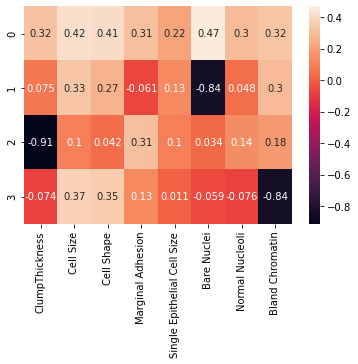

In [255]:
sns.heatmap(df_comp, annot=True)

<b>Observation:</b>
- PCA1(index 0) shows that Bare Nuclei is having more information while Normal Nucleoli is having less information.
- PCA2(index 1) shows that Cell Size is having more information and there is less information in Normal Nucleoli. 
- PCA3(index 2) shows that Marginal Adhesion is having more information.
- PCA4(index 3) shows that there is more information in Cell Size. 